In [1]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
import datajoint as dj
from datetime import datetime
from pathlib import Path
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import workflow
from matplotlib import pyplot as plt
import spikeinterface as si
from spikeinterface import widgets, exporters, postprocessing, qualitymetrics, sorters
import probeinterface as pi
from probeinterface import plotting
from workflow.pipeline import *
from workflow.utils.ingestion_utils import El2ROW
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
from element_interface.utils import dict_to_uuid, find_full_path, find_root_directory, _to_Path



[2024-03-22 14:13:30,934][INFO]: Connecting judewerth@db.datajoint.com:3306
[2024-03-22 14:13:31,688][INFO]: Connected judewerth@db.datajoint.com:3306


In [5]:
# Raster Plots
organoid = "O14"
drug = "No Drug"

path = get_processed_root_data_dir() / "spike_sorting" / organoid / drug
output = os.listdir(path)[0]
datapath = path / output

# Imports PIL module  
from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open(datapath / "raster.png")  
  
# This method will show image in any image viewer  
im.show()  

In [31]:
session_info = dict(
    organoid_id = "O09",
    experiment_start_time="2023-05-18 12:25:00",
    insertion_number=0,
    start_time = "2023-05-18 12:25:00",
    end_time = "2023-05-18 12:30:00",
    session_type="spike_sorting",
    unit = 1
    )
# sample = (ephys.CuratedClustering.Unit() & session_info).fetch1()
ephys.WaveformSet.PeakWaveform()
# ephys.QualityMetrics.Cluster()
# ephys.ClusteringTask()


organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,peak_electrode_waveform (uV) mean waveform for a given unit at its representative electrode
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,0,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,1,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,2,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,3,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,4,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,5,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,6,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,7,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,8,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,9,=BLOB=


### Select from the following list of experiments

In [ ]:
display(culture.Experiment().proj("experiment_end_time", "drug_name", "drug_concentration", "experiment_plan").fetch(format="frame").reset_index())


### Create `spike_sorting` sessions

In [ ]:
session_info = dict(
    organoid_id = "O10",
    experiment_start_time="2023-05-18 12:25:00",
    insertion_number=0,
    start_time = "2023-05-18 12:45:00",
    end_time = "2023-05-18 12:50:00",
    session_type="spike_sorting",
    )

session_probe_info = dict(
    organoid_id = "O10",
    experiment_start_time= "2023-05-18 12:25:00",
    insertion_number=0,
    start_time = "2023-05-18 12:45:00",
    end_time = "2023-05-18 12:50:00",
    probe="Q983",  # probe serial number
    port_id="A",  # Port ID ("A", "B", etc.)
    used_electrodes=[5]  # empty if all electrodes were used
    )

In [ ]:
# Insert the session
SPIKE_SORTING_DURATION = 120 # minutes

start_time = datetime.strptime(session_info["start_time"], '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime(session_info["end_time"], '%Y-%m-%d %H:%M:%S')
duration = (end_time - start_time).total_seconds() / 60

assert session_info["session_type"] == "spike_sorting" and duration <= SPIKE_SORTING_DURATION, \
    f"Session type must be 'spike_sorting' and duration must be less than {SPIKE_SORTING_DURATION} minutes"

ephys.EphysSession.insert1(session_info, ignore_extra_fields=True, skip_duplicates=True)

ephys.EphysSessionProbe.insert1(session_probe_info, ignore_extra_fields=True, skip_duplicates=True)

del session_probe_info["used_electrodes"]
display(ephys.EphysSession & session_info)
display(ephys.EphysSessionProbe & session_probe_info)

### Load data

In [ ]:
query = culture.Experiment().proj("drug_name") * ephys.EphysSession & {"session_type": "spike_sorting"} 
key = (query & session_info).fetch1()

title = "_".join([key["organoid_id"], key["start_time"].strftime("%Y%m%d%H%M"), key["end_time"].strftime("%Y%m%d%H%M"), key["drug_name"].replace(" ", "")])
spike_sorting_path = get_processed_root_data_dir() / "spike_sorting" / title
spike_sorting_path.mkdir(exist_ok=True , parents=True)
# This doesn't work untill you make a spike_sorting folder at the end of spike_sorting_path

files = (
    ephys.EphysRawFile
    & f"file_time BETWEEN '{key['start_time']}' AND '{key['end_time']}'"
).fetch("file_path", order_by="file_time")

[print(file) for file in files]
print(f"\nNumber of files: {len(files)} ({key['drug_name']})")

In [ ]:
# Remove Folder before in files
f = 0

for file in files:
    file_list = file.split("/")
    name = file_list[-1]

    name = name.removeprefix("processed_")
    
    files[f] = name
    f += 1
print(files)

# Make list of all possible data roots
data_roots = []

for folder in os.listdir(get_ephys_root_data_dir()):
    data_roots.append(get_raw_root_data_dir() / folder)
print(data_roots)

In [ ]:
# 1. Read the raw data as a recording object.
# 2. Concatenate the object for one session.

stream_name = "RHD2000 amplifier channel"
if (spike_sorting_path / "recording.pkl").exists():
    recording = si.load_extractor(spike_sorting_path / "recording.pkl")
else:
    recording = None
    t_start = file_times[0]
    for file in [find_full_path(data_roots, f) for f in files]:
        print(f"Processing {file}.")
        if not recording:
            recording = si.extractors.read_intan(file, stream_name=stream_name)
        else:
            recording = si.concatenate_recordings([recording, si.extractors.read_intan(file, stream_name=stream_name)])
            
    recording.dump_to_pickle(file_path=spike_sorting_path / "recording.pkl")  # lazy dumping (not actual traces, only the information on how to reconstruct the recording gets dumped)
    # recording.save(folder=spike_sorting_path)  # save on disk
recording

In [ ]:
# Prepare to Record Files
stream_name = "RHD2000 amplifier channel"
datapath = get_processed_root_data_dir() / "recording"
datapath.mkdir(exist_ok=True , parents=True)
recording_list = []
recording = None

for file in files:

    filename = file[0:-4] + ".pkl"
    filedata = None

    # Get Recording Data for Single File
    if (datapath / filename).exists():
        filedata = si.load_extractor(datapath / filename)
    else:
        filepath = find_full_path(data_roots , file)
        print(f"Processsing {file} Recording.")

        filedata = si.extractors.read_intan(filepath , stream_name=stream_name)
        filedata.dump_to_pickle(file_path = datapath / filename)


    # if not recording:
    #     recording = filedata
    # else:
    #     recording = si.concatenate_recordings([recording , filedata])
        
    recording_list.append(filedata)

recording = si.concatenate_recordings(recording_list = recording_list)

recording


In [ ]:
# Useful APIs

# traces = recording.get_traces(return_scaled=True)  # return values in uV
# print(traces)
# recording.get_times() # get timestamps
# recording.get_time_info()  # {'sampling_frequency': 20000.0, 't_start': None, 'time_vector': None}
# recording.neo_reader
# recording.has_time_vector()  # false
# recording.sampling_frequency

In [ ]:
print(traces.shape)
raw_channel_signal = traces[:,1]
index = np.argmax(raw_channel_signal)

plt.plot(raw_channel_signal[index-1000:index+1000])


### Generate probe

In [ ]:
# Get probe info
manufacturer = 'neuronexus'
probe_info = (ephys.EphysSessionProbe & key).fetch1()
probe_type = ((probe.Probe * ephys.EphysSessionProbe()) & key).fetch1("probe_type")

electrode_query = probe.ElectrodeConfig.Electrode & (
    probe.ElectrodeConfig & {"probe_type": probe_type}
)
number_of_electrodes = len(electrode_query)

# Filter for used electrodes. If probe_info["used_electrodes"] is None, it means all electrodes were used.
probe_info["used_electrodes"] = probe_info["used_electrodes"] or list(range(number_of_electrodes))
unused_electrodes = [elec for elec in range(number_of_electrodes) if elec not in probe_info["used_electrodes"]]
electrode_query &= (
    f'electrode IN {tuple(probe_info["used_electrodes"])}'
)
    
channel_to_electrode_map = dict(zip(*electrode_query.fetch("channel", "electrode")))

channel_to_electrode_map = {
    f'{probe_info["port_id"]}-{int(channel):03d}': electrode
    for channel, electrode in channel_to_electrode_map.items()
}
print(channel_to_electrode_map)
lfp_indices = np.sort(np.array(electrode_query.fetch("channel"), dtype=int))

# # Useful APIs
# p.device_channel_indices
# p.contact_ids

In [ ]:
# Create a custom plot using the probe information
fig, ax = plt.subplots(figsize=(7, 7))

# Create a session probe
linear_probe = pi.generate_linear_probe(num_elec=32, ypitch=100, contact_shape_params={'radius': 15})
linear_probe.set_device_channel_indices(El2ROW)

try:
    contact_colors = ["r" if e in probe_info["used_electrodes"] else "w" for e in range(number_of_electrodes)]  # red for used channels
except TypeError:
    contact_colors = list("r" * number_of_electrodes)

# Plot the probe   
pi.plotting.plot_probe(linear_probe, ax=ax, contacts_colors=contact_colors)
[spine.set_visible(False) for spine in ax.spines.values()]
ax.yaxis.set_ticks_position("none")  # Remove y-axis tick marks
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("($\\mu m$)", fontsize=10)
ax.set_title(title + "\n" + probe_type)
contact_positions = linear_probe.contact_positions
device_channel_indices = [f"{probe_info['port_id']}-{ch:03}" for ch in linear_probe.device_channel_indices]

for (x, y), txt in zip(contact_positions, device_channel_indices):
    ax.text(x + 100, y, txt, va="center", fontsize=8)

if not (spike_sorting_path / "probe.pdf").exists():
    fig.savefig(spike_sorting_path / "probe.pdf")

recording = recording.set_probe(linear_probe)
recording.get_probe().to_dataframe(complete=True).sort_values(by="contact_ids", key=lambda col: col.astype(int))


#### Preprocessing

In [ ]:
# Remove unused electrodes
if unused_electrodes:
    recording = recording.remove_channels(
        remove_channel_ids=np.array([str(elec) for elec in unused_electrodes])
    )
print(recording)
print(recording.get_probe())

In [ ]:
from spikeinterface import preprocessing

recording_f = si.preprocessing.bandpass_filter(recording=recording, freq_min=300, freq_max=6000)
recording_cmr = si.preprocessing.common_reference(recording=recording_f, operator="median")

trace_raw = recording.get_traces(start_frame=100_000, end_frame=101_000, return_scaled=True)
trace_preprocessed = recording_cmr.get_traces(start_frame=100_000, end_frame=101_000, return_scaled=True)

plt.plot(trace_raw [:, 0], label='Raw')
plt.plot(trace_preprocessed[:, 0], label='Preprocessed')
plt.legend()

# del trace_raw, trace_preprocessed

In [ ]:
plt.plot(trace9 [:, 0], label='O9')
plt.plot(trace10[:, 0], label='O10')
plt.legend()

In [ ]:
import seaborn as sns
data = recording_cmr.get_traces(start_frame=0, end_frame=20000, return_scaled=True)

fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
offset = 50

for i in range(data.shape[1]):
    ax.plot(np.r_[:data.shape[0]] / recording_cmr.sampling_frequency, data[:, i] + i * offset, linewidth=0.2)
    ytick_loc.append(i * offset)

ax.set_yticks(ytick_loc)
ax.set_yticklabels([device_channel_indices[i] for i in probe_info["used_electrodes"]])
ax.set_title(title)
ax.tick_params(length=0)
ax.set(xlabel="Time (s)")
sns.despine(right = True, left = True)

if not (spike_sorting_path / "raw_trace.png").exists():
    fig.savefig(spike_sorting_path / "raw_trace.png")

In [ ]:
tt = recording_cmr.get_traces()
tt.shape

### Run sorter

#### spiking circus 2

In [ ]:
# Install the following for running spiking circus
# Installed
# %pip install hdbscan
# %pip install numba
recording_f = si.preprocessing.bandpass_filter(recording=recording, freq_min=300, freq_max=6000)
recording_cmr = si.preprocessing.common_reference(recording=recording_f, operator="median")
recording_1 = recording_cmr.select_segments(1)
recording_2 = recording_cmr.select_segments(2)
print(recording_1)
print(recording_2)
recording2 = r
# IDK its maybe somthing about segments it doesn't like, it works for some (0) but not for others (1 and 2)
sorting = si.sorters.run_sorter(recording=recording2, output_folder=sorting_folder, sorter_name=sorter_name, remove_existing_folder=True,
    verbose=True
    )

In [ ]:
# Run sorter. Load the sorting data if it already exists
sorter_name = "spykingcircus2"
sorting_folder = _to_Path("/Users/judewerth/Library/Caches/utah_organoids/outbox/spykingcircus2/O17_202307131250_202307131255_Bicuculline")
# spike_sorting_path / sorter_name

if (sorting_folder / "sorting.pkl").exists():
    sorting = si.load_extractor(sorting_folder / "sorting.pkl")
else:
    sorting = si.sorters.run_sorter(recording=recording_cmr, output_folder=sorting_folder, sorter_name=sorter_name, remove_existing_folder=True,
    verbose=True
    )
    
    sorting.dump_to_pickle(file_path= sorting_folder / "sorting.pkl")

    # sorting.save(folder=sorting_folder)

In [ ]:
sorter_name = "spykingcircus2"
savefolder = "test"

datapath = get_processed_root_data_dir() / sorter_name
savepath = datapath / savefolder

(savepath / "sorting.pkl").exists()
type(savepath / "sorting.pkl")

In [ ]:
# Waveform extraction
# Load if the waveform folder already exists. Otherwise, extract waveforms from the recording.
if (sorting_folder / "waveform").exists():
    we = si.load_waveforms(sorting_folder / "waveform", with_recording=True)

else:
    we = si.extract_waveforms(
        recording_cmr,
        sorting,
        folder=sorting_folder / "waveform",
        ms_before=1.5,
        ms_after=2.,
        max_spikes_per_unit=500,
        # overwrite=True,
    )
    # when do we save the waveforms?
    print(we)

In [ ]:
plt.plot(we.get_template(0))

In [ ]:
si.widgets.plot_unit_templates(we, unit_ids=sorting.unit_ids[0:-1], ncols=5)
# si.widgets.plot_unit_templates(we, ncols=5)

In [ ]:
unit_id = 6
si.widgets.plot_unit_waveforms(we, unit_ids=[sorting.unit_ids[unit_id]])

fig, ax = plt.subplots()
template = we.get_template(unit_id=sorting.unit_ids[unit_id], mode='median')
ax.plot(template[:, 0])
plt.show()

In [ ]:
# Plot rasters
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
si.widgets.plot_rasters(sorting, time_range=[0, 5], ax=ax)
ax.set_ylabel("Unit ID")
ax.set_title(title)
# si.widgets.plot_rasters(sorting, time_range=[0, 5], unit_ids=[unit_id], ax=ax)
sns.despine()

if not (spike_sorting_path / "raster.png").exists():
    fig.savefig(spike_sorting_path / "raster.png")

#### QC metrics

In [ ]:
# Save quality metrics 
metrics = si.qualitymetrics.compute_quality_metrics(
    we,
    metric_names=[
        "firing_rate",
        "snr",
        "presence_ratio",
        "isi_violation",
        "num_spikes",
        "amplitude_cutoff",
        "amplitude_median",
        "sliding_rp_violation",
        "rp_violation",
        "drift",
    ],
)

metrics.to_csv(sorting_folder / "metrics.csv")
metrics

In [ ]:
a = metrics.get("firing_rate")
print(a)
print(sum(a))

In [ ]:
# Export to report
# from spikeinterface import exporters
_ = si.postprocessing.compute_spike_amplitudes(waveform_extractor=we)
# _ = si.postprocessing.compute_correlograms(waveform_extractor=we)
_ = si.qualitymetrics.compute_quality_metrics(waveform_extractor=we, metric_names=['snr', 'isi_violation', 'presence_ratio'])

si.exporters.export_report(we, output_folder=sorting_folder / "report")

#### Kilosort2_5

In [ ]:
# !pip install docker
# !pip install cuda-python

In [ ]:
sorter_name="kilosort2"
sorting_folder = get_processed_root_data_dir() / (key["organoid_id"] + "-" + str(key["start_time"].time()).replace(":", "-")) / sorter_name

sorting_kilosort = si.sorters.run_sorter(
    recording=recording_cmr,
    sorter_name=sorter_name, 
    output_folder=sorting_folder,
    remove_existing_folder=True,
    verbose=True,
    docker_image=True,
)

In [2]:
# Load Modules

# Avaiable Files
# Datajoint Doesn't recognize Control Files (need to take overnight files)

# Batch 1
# Control - 230518_0930 --> 230518_1000
# 4AP - 230518_1240 --> 230518_1310
# Bicu - 230519_0945 --> 230519_1015
# TTX - 230519_1600 --> 230519_1630

# Batch 2
# Control - 230608_1600 --> 230608_1630
# 4AP - 230608_1920 --> 230608_1950
# Bicu - 230609_1035 --> 230609_1105
# TTX - 230609_1555 --> 230609_1625


# Batch 3
# Control - 230712_1000 --> 230712_1030
# 4AP - 230712_1325 --> 230712_1355
# Bicu - 230713_1250 --> 230713_1320
# TTX - 230713_1830 --> 230713_1900

#%% 
# Import Modules
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
import datajoint as dj
from datetime import datetime
from pathlib import Path
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import workflow
from matplotlib import pyplot as plt
import spikeinterface as si
from spikeinterface import widgets, exporters, postprocessing, qualitymetrics, sorters
import probeinterface as pi
from probeinterface import plotting
from workflow.pipeline import *
from workflow.utils.ingestion_utils import El2ROW
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
from element_interface.utils import dict_to_uuid, find_full_path, find_root_directory, _to_Path
import seaborn as sns


# Show Experiments
# culture.Experiment()


[2024-03-14 19:21:03,530][INFO]: Connecting judewerth@db.datajoint.com:3306
[2024-03-14 19:21:04,329][INFO]: Connected judewerth@db.datajoint.com:3306


Session Data Loaded
Session Inserted
File Names Found
Processing /Users/judewerth/Library/CloudStorage/Box-Box/Organoid Data/Raw Data/O17-20/O17-20_230713_183714.rhd.
Processing /Users/judewerth/Library/CloudStorage/Box-Box/Organoid Data/Raw Data/O17-20/O17-20_230713_183814.rhd.
Processing /Users/judewerth/Library/CloudStorage/Box-Box/Organoid Data/Raw Data/O17-20/O17-20_230713_183914.rhd.
Processing /Users/judewerth/Library/CloudStorage/Box-Box/Organoid Data/Raw Data/O17-20/O17-20_230713_184014.rhd.
Processing /Users/judewerth/Library/CloudStorage/Box-Box/Organoid Data/Raw Data/O17-20/O17-20_230713_184114.rhd.
Recording Data Found
Probe Data found
Sorting Data Found
Waveform Data Found
Raster Plotted


/Users/judewerth/anaconda3/envs/utah_organoids/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:982: UserWarning: The drift metrics require the `spike_locations` waveform extension. Use the `postprocessing.compute_spike_locations()` function. Drift metrics will be set to NaN
  warnings.warn(


Metrics Found


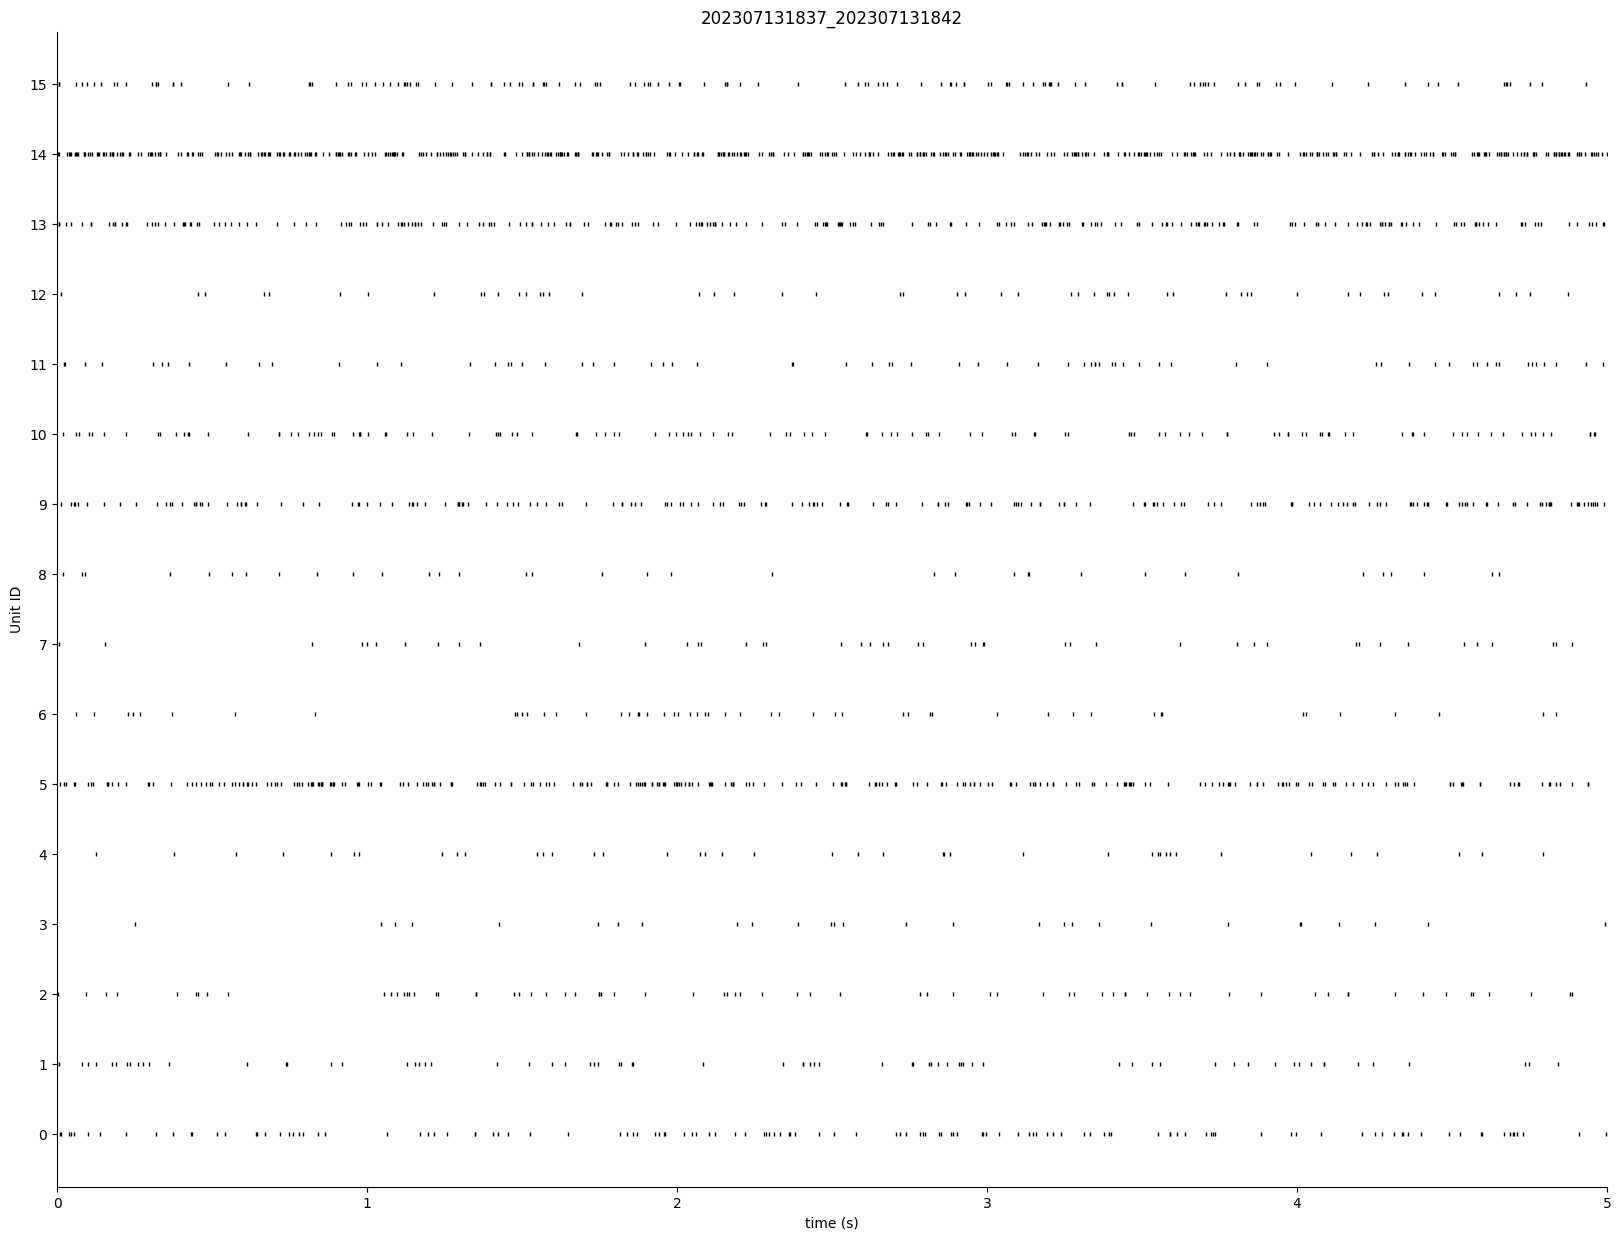

In [3]:
# Run Script
#%% 230518_0930
el_out = { # number electrodes outside of the organoid 
    "O09":32 , "O10":16 , "O11":20 , "O12":14 , 
    "O13":25 , "O14":13 , "O15":11 , "O16":11 ,
    "O17":22 , "O18":19 , "O19":20 , "O20":17
}

O = "O18"
# Load Session Data
session_info = dict(
    organoid_id = O,
    experiment_start_time = "2023-07-13 18:15:00",
    insertion_number=0,
    start_time = "2023-07-13 18:37:00",
    end_time = "2023-07-13 18:42:00",
    session_type="spike_sorting",
    )

session_probe_info = dict(
    organoid_id = O,
    experiment_start_time = "2023-07-13 18:15:00",
    insertion_number=0,
    start_time = "2023-07-13 18:37:00",
    end_time = "2023-07-13 18:42:00",
    probe="Q983",  # probe serial number
    port_id="A",  # Port ID ("A", "B", etc.)
    used_electrodes = El2ROW[:el_out[O]].tolist()
    )

# Make list of all possible data roots
data_roots = []

for folder in os.listdir(get_ephys_root_data_dir()):
    data_roots.append(get_raw_root_data_dir() / folder)

print("Session Data Loaded")

#%% 
# Insert the session
SPIKE_SORTING_DURATION = 120 # minutes

start_time = datetime.strptime(session_info["start_time"], '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime(session_info["end_time"], '%Y-%m-%d %H:%M:%S')
duration = (end_time - start_time).total_seconds() / 60

assert session_info["session_type"] == "spike_sorting" and duration <= SPIKE_SORTING_DURATION, \
    f"Session type must be 'spike_sorting' and duration must be less than {SPIKE_SORTING_DURATION} minutes"

ephys.EphysSession.insert1(session_info, ignore_extra_fields=True, skip_duplicates=True)

ephys.EphysSessionProbe.insert1(session_probe_info, ignore_extra_fields=True, skip_duplicates=True)

del session_probe_info["used_electrodes"]

query = culture.Experiment().proj("drug_name") * ephys.EphysSession & {"session_type": "spike_sorting"} 
key = (query & session_info).fetch1()

print("Session Inserted")

#%%
# Find File Names
title = "_".join([key["start_time"].strftime("%Y%m%d%H%M"), key["end_time"].strftime("%Y%m%d%H%M")])
ss_path = _to_Path("spike_sorting") / key["organoid_id"] / key["drug_name"] / title

# Find channel ids
if key["organoid_id"] in ["O09" , "O13" , "O17"]:
    organoid_idx = list(range(32))
elif key["organoid_id"] in ["O10" , "O14" , "O18"]:
    organoid_idx = list(range(32 , 64))
elif  key["organoid_id"] in ["O11" , "O15" , "O19"]:
    organoid_idx = list(range(64 , 96))
elif  key["organoid_id"] in ["O12" , "O16" , "O20"]:
    organoid_idx = list(range(96 , 128))
else:
    raise TypeError("Invalid organoid_id")

files = (
    ephys.EphysRawFile
    & f"file_time BETWEEN '{key['start_time']}' AND '{key['end_time']}'"
).fetch("file_path", order_by="file_time")

# Remove Folder before in files
f = 0

for file in files:
    file_list = file.split("/")
    name = file_list[-1]

    name = name.removeprefix("processed_")
    
    files[f] = name
    f += 1


print("File Names Found")

#%% 
# Get Recording Data // Whole Batch (all organoids)
stream_name = "RHD2000 amplifier channel"
datapath = get_processed_root_data_dir() / ss_path
datapath.mkdir(exist_ok=True , parents=True)
# recording_list = []
recording = None

if (datapath / "recording.pkl").exists():
    recording = si.load_extractor(datapath / "recording.pkl")

else:
    recording = None

    for file in [find_full_path(data_roots, f) for f in files]:
        print(f"Processing {file}.")
        if not recording:
            recording = si.extractors.read_intan(file, stream_name=stream_name)
        else:
            recording = si.concatenate_recordings(
                [recording, si.extractors.read_intan(file, stream_name=stream_name)]
            )

    # slice out channels for organoid
    channel_ids = recording.channel_ids
    recording = recording.channel_slice(channel_ids = channel_ids[organoid_idx])

recording.dump_to_pickle(file_path = datapath / "recording.pkl")  
    # lazy dumping (not actual traces, only the information on how to reconstruct the recording gets dumped)
    # recording.save(folder=spike_sorting_path)  # save on disk


print("Recording Data Found")

#%% 
# Get Probe Data
manufacturer = 'neuronexus'
probe_info = (ephys.EphysSessionProbe & key).fetch1()
probe_type = ((probe.Probe * ephys.EphysSessionProbe()) & key).fetch1("probe_type")

electrode_query = probe.ElectrodeConfig.Electrode & (
    probe.ElectrodeConfig & {"probe_type": probe_type}
)
number_of_electrodes = len(electrode_query)

# Filter for used electrodes. If probe_info["used_electrodes"] is None, it means all electrodes were used.
probe_info["used_electrodes"] = probe_info["used_electrodes"] or list(range(number_of_electrodes))
unused_electrodes = [elec for elec in range(number_of_electrodes) if elec not in probe_info["used_electrodes"]]

# Create a session probe
linear_probe = pi.generate_linear_probe(num_elec=32, ypitch=100, contact_shape_params={'radius': 15})
linear_probe.set_device_channel_indices(El2ROW)

recording = recording.set_probe(linear_probe)
recording.get_probe().to_dataframe(complete=True).sort_values(by="contact_ids", key=lambda col: col.astype(int))

# Remove unused electrodes
if unused_electrodes:
    recording = recording.remove_channels(
        remove_channel_ids=np.array([str(elec) for elec in unused_electrodes])
    )

print("Probe Data found")

#%%
# Filter Data
from spikeinterface import preprocessing
recording_f = si.preprocessing.bandpass_filter(recording=recording, freq_min=300, freq_max=6000)
recording_cmr = si.preprocessing.common_reference(recording=recording_f, operator="median")

# Run sorter. Load the sorting data if it already exists
sorter_name = "spykingcircus2"

if (datapath / "sorting.pkl").exists():
    sorting = si.load_extractor(datapath / "sorting.pkl")
else:
    sorting = si.sorters.run_sorter(recording=recording_cmr, output_folder=datapath, sorter_name=sorter_name, remove_existing_folder=True,verbose=True)
    sorting.dump_to_pickle(file_path = datapath / "sorting.pkl")

print("Sorting Data Found")

if (datapath / "waveform").exists():
    we = si.load_waveforms(datapath / "waveform", with_recording=True)
else:
    we = si.extract_waveforms(
        recording_cmr,
        sorting,
        folder = datapath / "waveform",
        ms_before=1.5,
        ms_after=2.,
        max_spikes_per_unit=500,
        # overwrite=True, 
       )

print("Waveform Data Found")

# Plot rasters
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
si.widgets.plot_rasters(sorting, time_range=[0, 5], ax=ax)
ax.set_ylabel("Unit ID")
ax.set_title(title)
# si.widgets.plot_rasters(sorting, time_range=[0, 5], unit_ids=[unit_id], ax=ax)
sns.despine()

if not (datapath / "raster.png").exists():
    fig.savefig(datapath / "raster.png")

print("Raster Plotted")

metrics = si.qualitymetrics.compute_quality_metrics(
    we,
    metric_names=[
        "firing_rate",
        "snr",
        "presence_ratio",
        "isi_violation",
        "num_spikes",
        "amplitude_cutoff",
        "amplitude_median",
        "sliding_rp_violation",
        "rp_violation",
        "drift",
    ],
)

metrics.to_csv(datapath / "metrics.csv")

print("Metrics Found")

recording.dump_to_pickle(file_path = datapath / "recording.pkl")  

In [11]:
r = si.load_extractor(datapath / 'spikeinterface_recording.json' , base_folder=datapath)

KeyboardInterrupt: 